# FBB the coding, is fine and all fits are correct. But I am missing the analysis! why do you get different fits? which is better, why? 
# All this content can be in the captions,not just what is plotted but how to interpret the figure.

# you must decribe with captions ALL OF your figures to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code (and to allow me to se that you understand the scientific inference). The notebook is a "presentation". 

# FBB your notebok is broken too. when you are done restart the kernel and run all cells from the top down. Your notebook keep variable in memory after you delete cells.  
 
# In the conclusions, though you have some good points, you missed the covariance of race and income which invalidates the first part of the analysis (and perhaps the second too)
# look for more comments int he cells containing FBB


In [2]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os
%pylab inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [4]:
allmales={"all":nan,"white":nan,"black":nan,"asian":nan,"hispanic":nan}
allfemales={"all":nan,"white":nan,"black":nan,"asian":nan,"hispanic":nan}

In [5]:
allmales["all"] = pd.read_excel( url + 'pinc08_2_1_1.xls',  header=9)
allmales["white"] = pd.read_excel( url + 'pinc08_2_1_4.xls',  header=9)
allmales["black"] = pd.read_excel( url + 'pinc08_2_1_6.xls',  header=9)
allmales["asian"] = pd.read_excel( url + 'pinc08_2_1_8.xls',  header=9)
allmales["hispanic"] = pd.read_excel( url + 'pinc08_2_1_9.xls',  header=9)
allfemales["all"] = pd.read_excel( url + 'pinc08_3_1_1.xls',  header=9)
allfemales["white"] = pd.read_excel( url + 'pinc08_3_1_4.xls',  header=9)
allfemales["black"] = pd.read_excel( url + 'pinc08_3_1_6.xls',  header=9)
allfemales["asian"] = pd.read_excel( url + 'pinc08_3_1_8.xls',  header=9)
allfemales["hispanic"] = pd.read_excel( url + 'pinc08_3_1_9.xls',  header=9)

In [6]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.65,0.0162


In [7]:
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [8]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### asian
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean          809.478261            150.347826         42.413043   
std          1476.967354            439.113765         59.593652   
min             2.000000              0.000000          0.000000   
25%            26.500000              2.000000          2.250000   
50%           147.500000             22.500000         13.000000   
75%           804.250000             62.500000         53.000000   
max          5648.000000           2178.000000        224.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean          53.934783         59.434783           56.717391   
std           82.427989         95.528623           93.491215   
min            0.000000          0.000000            0.000000   
25%            0.000000          2.000000         

In [9]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


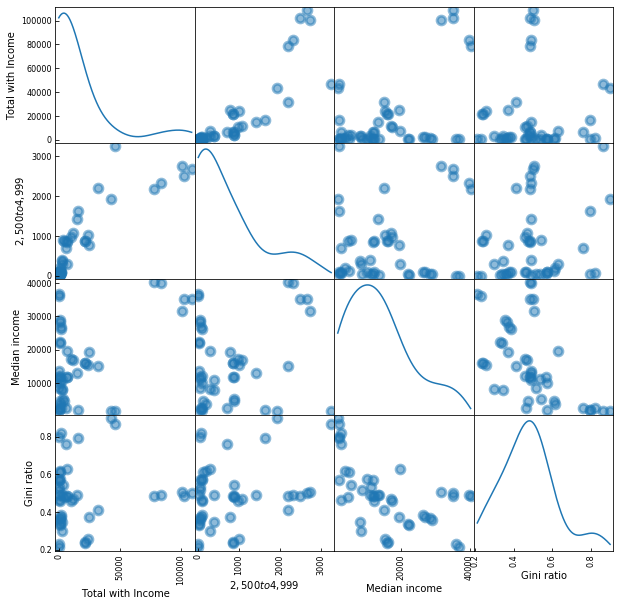

In [10]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=300, figsize=(10,10), 
                        diagonal='kde')  

#### Figure 1: Scatter Matrix of Total Income, USD 2,500 to USD 4,999, Median Income and Gini Ratio for Male

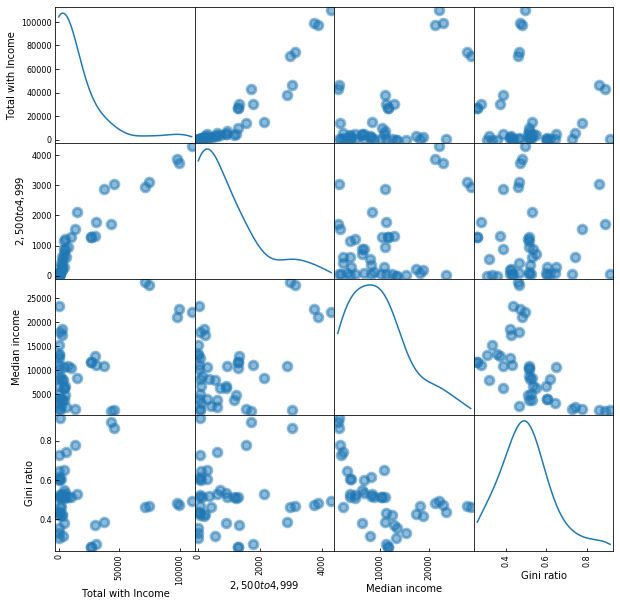

In [11]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=300, figsize=(10,10), 
                        diagonal='kde') 

#### Figure 2: Scatter Matrix of Total Income, USD 2,500 to USD 4,999, Median Income and Gini Ratio for Female

In [12]:
allmales

{'all':     Characteristic  Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
 0              NaN                NaN                   NaN               NaN   
 1              NaN             108706                  4407              2665   
 2              NaN              83555                  3217              2326   
 3              NaN              78263                  2779              2184   
 4              NaN               7014                  1478               280   
 5              NaN               1518                   804                62   
 6              NaN              21454                   555               859   
 7              NaN               2667                   298               283   
 8              NaN                456                   312                97   
 9              NaN               2899                   545               385   
 10             NaN                645                   103                87   
 11      

In [13]:
# Create a dataframe with total median incomes by gender, race by race.
income = pd.DataFrame(columns=['males','females'], index=['hispanic','all','black','white','asian'])
income.head()
# FBB remove testing outputs

,males,females
hispanic,NaN,NaN
all,NaN,NaN
black,NaN,NaN
white,NaN,NaN
asian,NaN,NaN


In [14]:
for k in allfemales:
    income["males"][k] = allmales[k]["Median income"][1]
    income["females"][k] = allfemales[k]["Median income"][1]

In [15]:
income

,males,females
hispanic,25411,17762
all,35228,22063
black,24855,20044
white,40122,23780
asian,40153,24840


In [16]:
# FBB there should be no outputs without explaination in the delivery ready notebook
income['males'][0]

25411.0

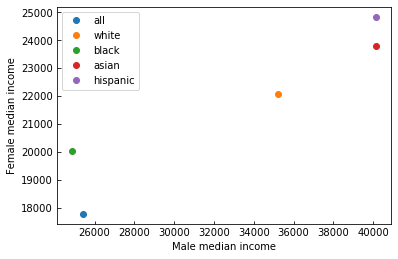

In [17]:
for i in range(5):
    pl.plot(income['males'][i],income['females'][i],'o')
pl.xlabel('Male median income')
pl.ylabel('Female median income')
pl.legend(['all','white','black','asian','hispanic'],fontsize=10, loc='best')

#### Figure 3: Scatter plots for Median Income by gender and race. 
# FBB If you had plotted the x=y line as indicated you could have commmented on yhe significance of all pointe being beow it at this point

In [18]:
m = list(income['males'])
f = list(income['females'])
income1 = pd.DataFrame(m,f)
income1

,0
17762,25411
22063,35228
20044,24855
23780,40122
24840,40153


In [19]:
predict=smf.ols(formula = 'f ~ m', data = income1).fit()
predict.params

Intercept    9989.844408
m               0.353141
dtype: float64

In [20]:
params = np.polyfit(m, f, 1)

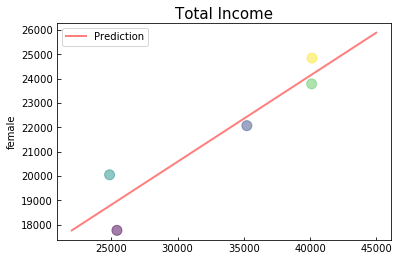

In [21]:
pl.scatter(m, f, c=range(1,6), s=100, alpha=0.5,) 
x=np.arange(22000,45000)
pl.plot(x, predict.params[1]*x+predict.params[0], linewidth = 2, color = 'red' , alpha = 0.5, label = 'Prediction')   
pl.ylabel("female", fontsize=10)
pl.title("Total Income", fontsize=15)
pl.legend(loc='best')

#### Figure 4: Linear Regression fit of Total Median Income by gender by Races

In [22]:
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

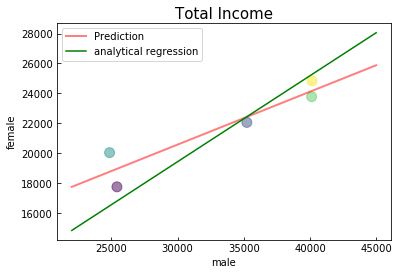

In [23]:
pl.scatter(m, f, c=range(1,6), s=100, alpha=0.5) 
x=np.arange(22000,45000)
pl.plot(x, predict.params[1]*x+predict.params[0], linewidth = 2, color = 'red' , alpha = 0.5, label = 'Prediction')   
pl.plot(x,beta0+beta1*x,'g-', label = 'analytical regression')
pl.xlabel("male", fontsize=10)
pl.ylabel("female", fontsize=10)
pl.title("Total Income", fontsize=15)
pl.legend(loc='best')

#### Figure 5: Numerical and Analytical Linear Regression Fit

## FBB BUT WHAT DOES IT MEAN?? you must comment on what you see and suggest an interpretation. why are the slopes so different??

In [24]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

In [25]:
df1=pd.DataFrame(all_males_allincomes[mask],columns=['male'])
df1['female']=all_females_allincomes[mask]

In [26]:
df1.head()

,male,female
0,35228,22063
1,39903,27736
2,40298,28402
3,19557,10732
4,2359,1635


In [27]:
predict1=smf.ols(formula = 'female ~ male', data = df1).fit()
predict1.params

Intercept    1493.039441
male            0.609021
dtype: float64

In [28]:
no_intercept=smf.OLS(df1['female'],df1['male']).fit()
no_intercept.params

male    0.671428
dtype: float64

In [29]:
cor = stats.spearmanr(df1.male, df1.female)
beta1 = cor[0] * df1.female.std() / df1.male.std()
beta0 = df1.female.mean() - beta1 * df1.male.mean()
beta0, beta1

(1293.7640487731405, 0.62234483903975313)

In [30]:
# FBB your notebook is broken... allways restart the kernel ad rerun from the top
males[0]

NameError: name 'males' is not defined

In [ ]:
figsize(6,8)
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=50, color ='g' ,alpha=0.5, label='original') 
pl.scatter(males[0],females[0],s=200,color='c',label='all',alpha=0.6)
pl.scatter(males[1],females[1],s=200,color='grey',label='white',alpha=0.6)
pl.scatter(males[2],females[2],s=200,color='magenta',label='black',alpha=0.6)
pl.scatter(males[3],females[3],s=200,color='y',label='asian',alpha=0.6)
pl.scatter(males[4],females[4],s=200,color='pink',label='hispanic',alpha=0.6)
x=np.arange(0,45000)
pl.plot(x, predict1.params[1]*x+predict1.params[0], linewidth = 1, color = 'red' , alpha = 0.5, label = 'Linear regression')   
pl.plot(x,beta0+beta1*x,'b--', linewidth = 1, label = 'Analytical regression')
pl.plot(x,no_intercept.params[0]*x,color='purple',label='No interception',linewidth=0.5)
pl.plot(x,x,'k--',label='m=f',linewidth=1)
pl.xlabel("male", fontsize=10)
pl.ylabel("female", fontsize=10)
pl.title("Total Income", fontsize=15)
pl.xlim(left=0)
pl.ylim(bottom=0)
pl.legend(fontsize=10, loc='best')

#### Figure 6: Different linear fits for the data
# FBB again: what does it mean? why is the slope to all datapoints different from some of the fit, which is better? why/

### 6. PREDICTION
Now pick a stipend (maybe your ideal stipend).
and predict what a woman in a position where a man recieves your ideal stipend would make

In [31]:
Female_predict = 50000*predict1.params[1]+predict1.params[0]
print ("Female predict income when male recieved $50000 is $%s" % Female_predict)

Female predict income when male recieved $50000 is $31944.065622


### 7. lastly do you have any comments about what these data tell us about race?

The White people and Asian earn much more than other races on average, but also they have much more gap between female income and male income.  We can generate two hypothesis to test these 2 foundings.

# FBB  that is true, but ethnicity is covariant with income, which  invalidate the first part of the analysis and may invalidate the second the analysis (see my solution)¶